In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Data cleaning libraries
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
import scipy

#Model building
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data = pd.read_csv('Tweets.csv')

In [5]:
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/02/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24/02/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24/02/2015 11:14,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,5.695880e+17,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,22/02/2015 12:01,NaN,NaN
14636,5.695870e+17,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,22/02/2015 11:59,Texas,NaN
14637,5.695870e+17,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,22/02/2015 11:59,"Nigeria,lagos",NaN
14638,5.695870e+17,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,22/02/2015 11:59,New Jersey,Eastern Time (US & Canada)


In [6]:
data.drop('tweet_id',inplace=True,axis=1)

In [7]:
data

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/02/2015 11:35,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24/02/2015 11:15,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24/02/2015 11:14,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,22/02/2015 12:01,NaN,NaN
14636,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,22/02/2015 11:59,Texas,NaN
14637,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,22/02/2015 11:59,"Nigeria,lagos",NaN
14638,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,22/02/2015 11:59,New Jersey,Eastern Time (US & Canada)


In [8]:
data.isnull().sum()

airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [9]:
data.drop(['negativereason_confidence','airline_sentiment_gold','negativereason_gold','tweet_coord','tweet_location','user_timezone'],axis=1,inplace=True)

In [10]:
data

,airline_sentiment,airline_sentiment_confidence,negativereason,airline,name,retweet_count,text,tweet_created
0,neutral,1.0000,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,24/02/2015 11:35
1,positive,0.3486,NaN,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,24/02/2015 11:15
2,neutral,0.6837,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,24/02/2015 11:15
3,negative,1.0000,Bad Flight,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,24/02/2015 11:15
4,negative,1.0000,Can't Tell,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,24/02/2015 11:14
...,...,...,...,...,...,...,...,...
14635,positive,0.3487,NaN,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,22/02/2015 12:01
14636,negative,1.0000,Customer Service Issue,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,22/02/2015 11:59
14637,neutral,1.0000,NaN,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,22/02/2015 11:59
14638,negative,1.0000,Customer Service Issue,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",22/02/2015 11:59


In [11]:
#Data analysis

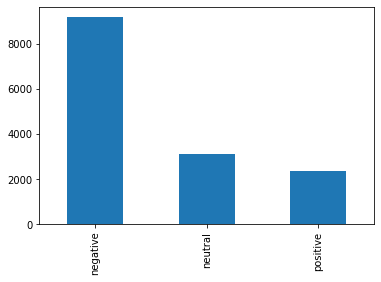

In [12]:
data['airline_sentiment'].value_counts().plot(kind='bar')

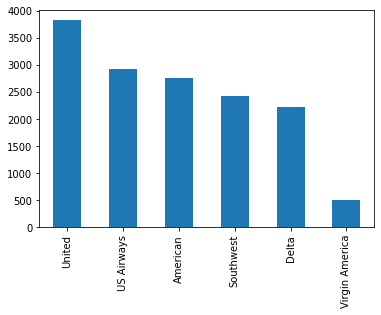

In [13]:
data['airline'].value_counts().plot(kind='bar')

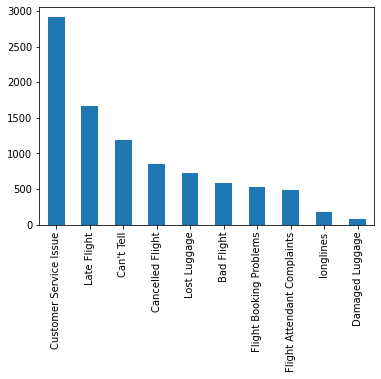

In [14]:
data['negativereason'].value_counts().plot(kind='bar')

In [15]:
df_each_airline_sentiment = pd.crosstab(data['airline'],data['airline_sentiment'])

In [16]:
df_each_airline_sentiment

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


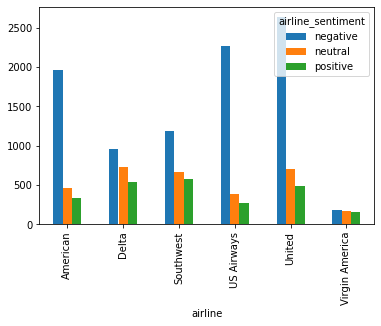

In [17]:
df_each_airline_sentiment.plot(kind='bar')

In [18]:
df_each_airline_negativereason = pd.crosstab(data['airline'],data['negativereason'])

In [19]:
df_each_airline_negativereason.style.highlight_max(color = 'red',axis=1)

negativereason,Bad Flight,Can't Tell,Cancelled Flight,Customer Service Issue,Damaged Luggage,Flight Attendant Complaints,Flight Booking Problems,Late Flight,Lost Luggage,longlines
airline,,,,,,,,,,
American,87,198,246,768,12,87,130,249,149,34
Delta,64,186,51,199,11,60,44,269,57,14
Southwest,90,159,162,391,14,38,61,152,90,29
US Airways,104,246,189,811,11,123,122,453,154,50
United,216,379,181,681,22,168,144,525,269,48
Virgin America,19,22,18,60,4,5,28,17,5,3


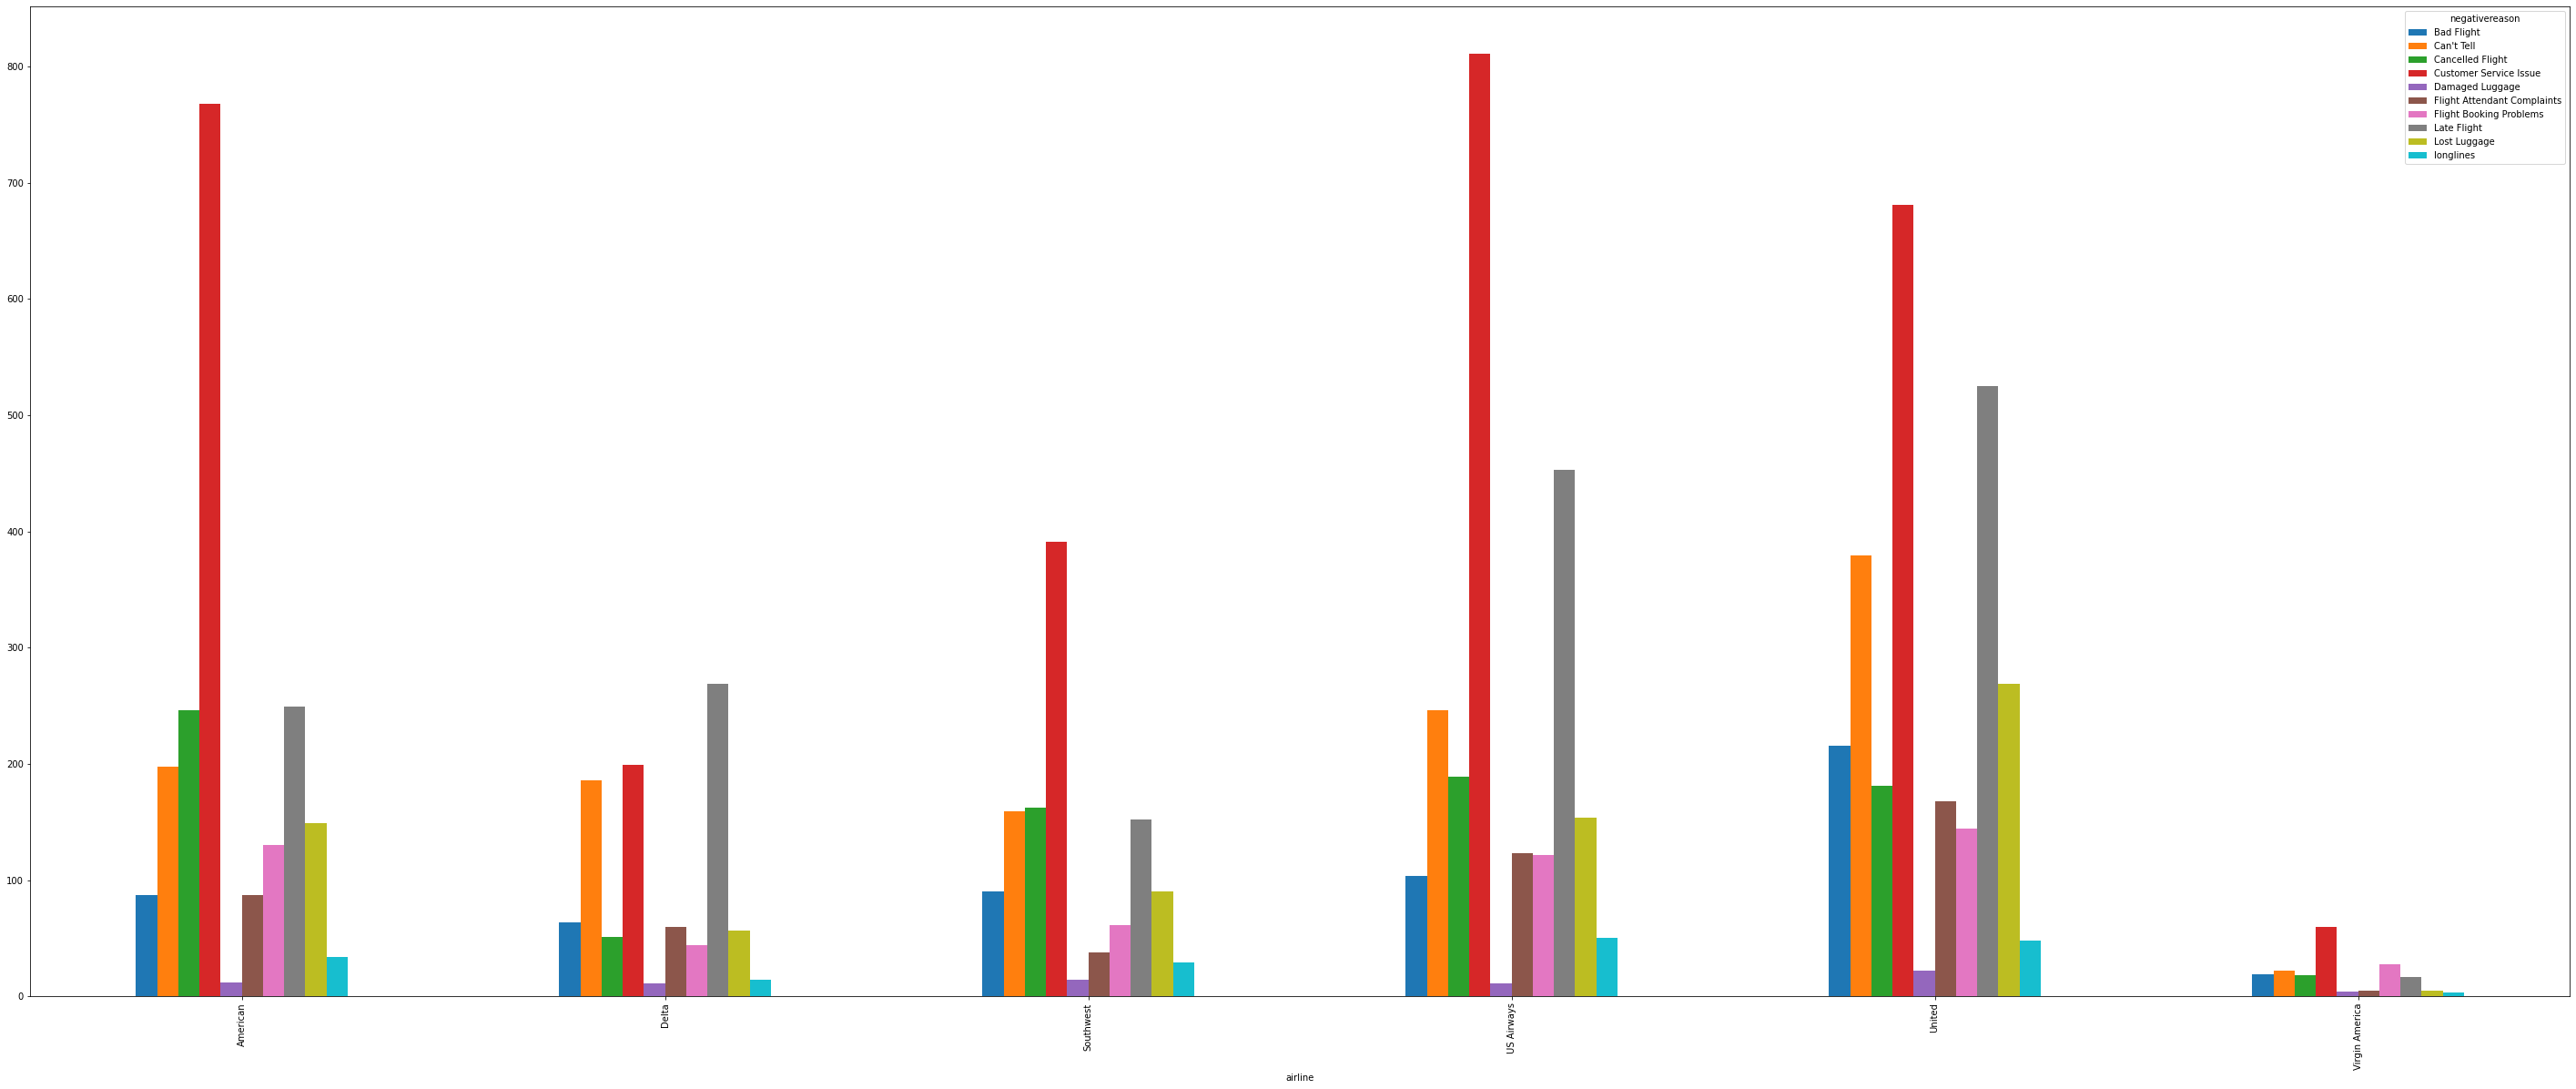

In [20]:
df_each_airline_negativereason.plot(kind='bar',figsize=(50,20))

In [21]:
data['tweet_created'] = pd.to_datetime(data['tweet_created']).dt.strftime('%d-%m-%y')

In [22]:
data['tweet_created']

0        24-02-15
1        24-02-15
2        24-02-15
3        24-02-15
4        24-02-15
           ...   
14635    22-02-15
14636    22-02-15
14637    22-02-15
14638    22-02-15
14639    22-02-15
Name: tweet_created, Length: 14640, dtype: object

In [23]:
data['tweet_created'].min()

'16-02-15'

In [24]:
data['tweet_created'].max()

'24-02-15'

In [25]:
data_negative_sentiment_most_on_day=pd.crosstab(data['tweet_created'],data['airline_sentiment'])

In [26]:
data_negative_sentiment_most_on_day.max()

airline_sentiment
negative    2266
neutral      676
positive     433
dtype: int64

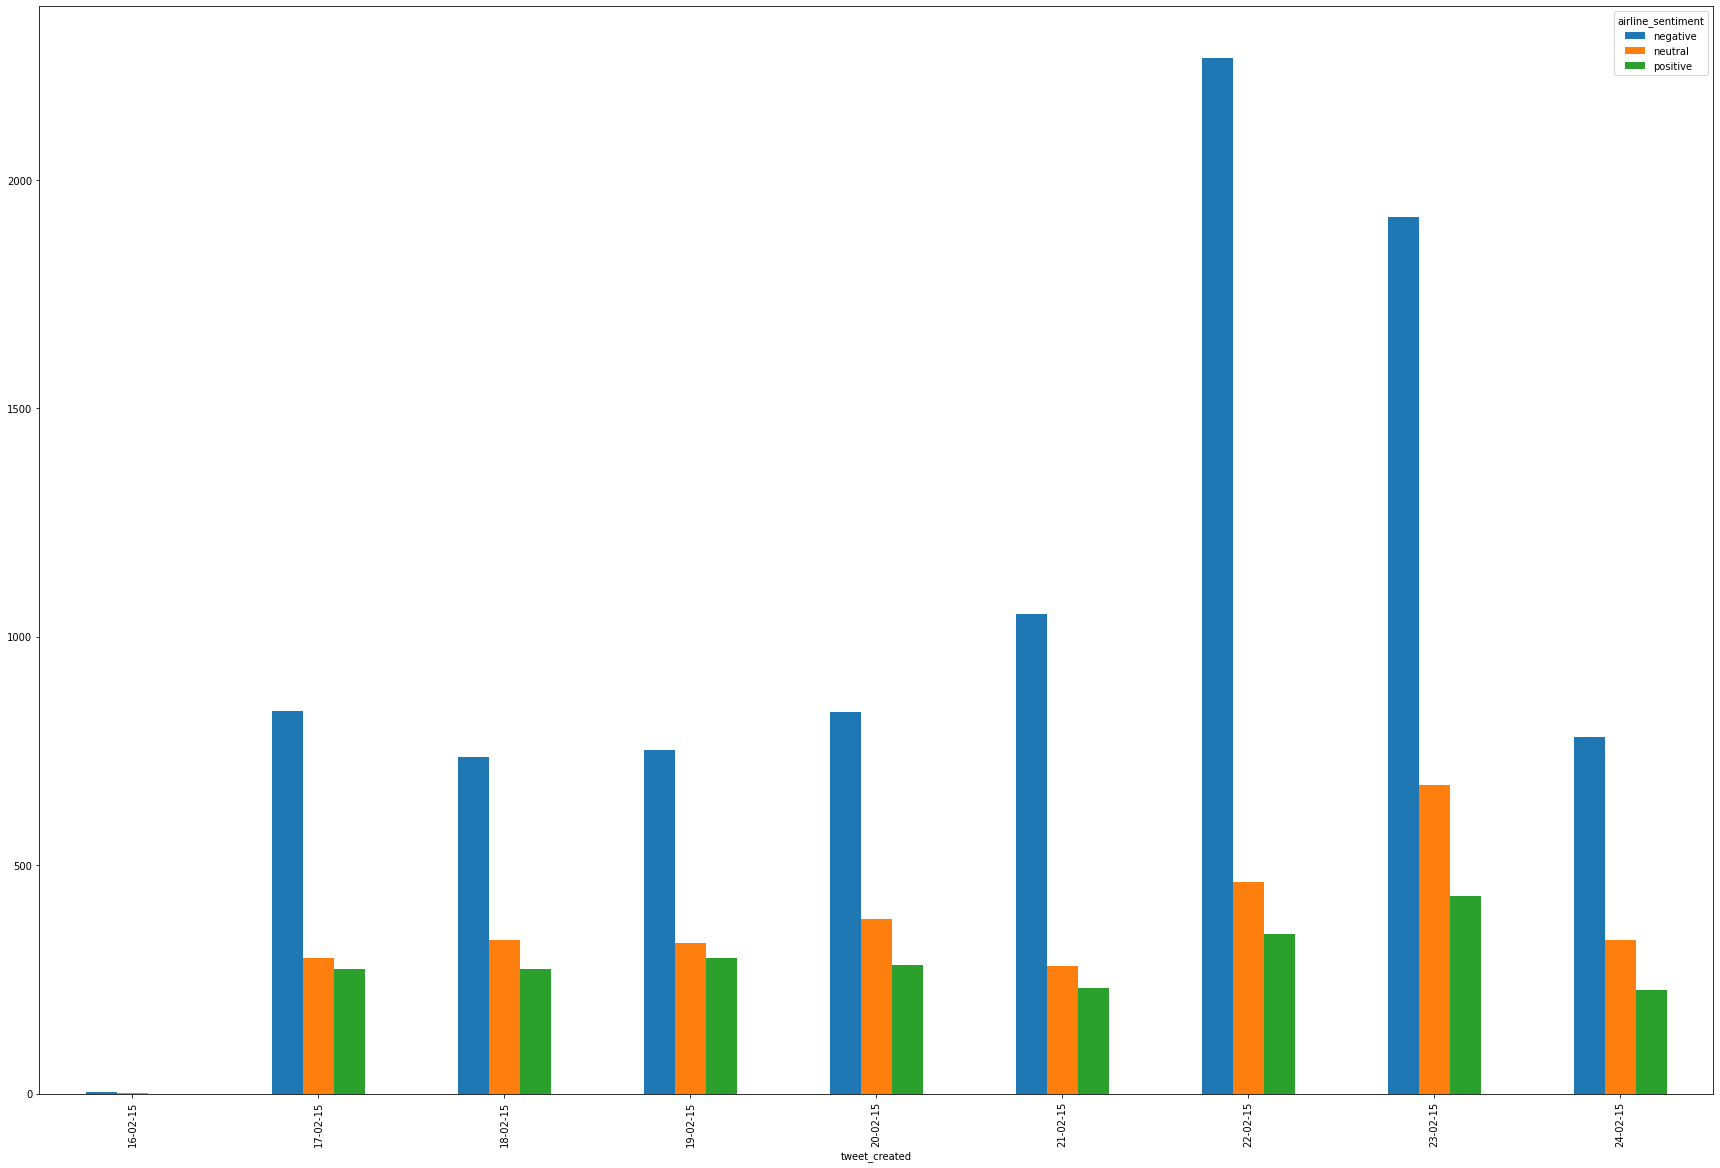

In [27]:
data_negative_sentiment_most_on_day.plot(kind='bar',figsize=(30,20))

In [28]:
#Data cleaning

In [29]:
stops = set(stopwords.words('english'))

In [30]:
len(stops)

179

In [31]:
def data_clean(sentence):
  words = sentence.lower()      #converts all the capital letters into small letters
  words = re.sub('[^a-z]',' ',words)    #substitute
  words = words.split()     # it will create a list
  imp_words = [w for w in words if w not in stops] #the words that are not stop words
  return(' '.join(imp_words))   # to join the words into a sentence


In [32]:
ex = 'it is 9:40 and we are not tired and we still want to learn deep learning and stay up till 11'

In [33]:
data_clean(ex)

'tired still want learn deep learning stay till'

In [34]:
data['clean_text'] = data.text.apply(lambda x:data_clean(x))

In [35]:
result = data[['text','clean_text']]

In [36]:
result['count text'] = result['clean_text'].apply(lambda x: len(x.split()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
result

,text,clean_text,count text
0,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said,3
1,@VirginAmerica plus you've added commercials t...,virginamerica plus added commercials experienc...,6
2,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anothe...,8
3,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...,11
4,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing,5
...,...,...,...
14635,@AmericanAir thank you we got on a different f...,americanair thank got different flight chicago,6
14636,@AmericanAir leaving over 20 minutes Late Flig...,americanair leaving minutes late flight warnin...,14
14637,@AmericanAir Please bring American Airlines to...,americanair please bring american airlines bla...,6
14638,"@AmericanAir you have my money, you change my ...",americanair money change flight answer phones ...,9


In [38]:
result = result.join(data['airline_sentiment'])

In [39]:
result['count text'].min()

1

In [40]:
result['count text'].max()

23

(array([ 893., 1302., 1706., 2067., 2726., 4090., 1338.,  413.,   85.,
          20.]),
 array([ 1. ,  3.2,  5.4,  7.6,  9.8, 12. , 14.2, 16.4, 18.6, 20.8, 23. ]),
 <a list of 10 Patch objects>)

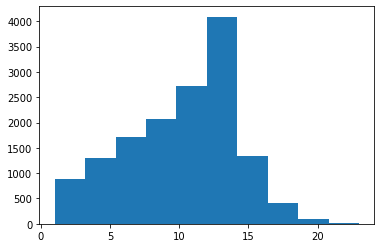

In [41]:
plt.hist(result['count text'])

In [42]:
result.drop(['count text','text'],axis=1)

,clean_text,airline_sentiment
0,virginamerica dhepburn said,neutral
1,virginamerica plus added commercials experienc...,positive
2,virginamerica today must mean need take anothe...,neutral
3,virginamerica really aggressive blast obnoxiou...,negative
4,virginamerica really big bad thing,negative
...,...,...
14635,americanair thank got different flight chicago,positive
14636,americanair leaving minutes late flight warnin...,negative
14637,americanair please bring american airlines bla...,neutral
14638,americanair money change flight answer phones ...,negative


In [43]:
new_df = result

In [44]:
new_df = new_df.drop(['count text','text'],axis=1)

In [45]:
new_df

,clean_text,airline_sentiment
0,virginamerica dhepburn said,neutral
1,virginamerica plus added commercials experienc...,positive
2,virginamerica today must mean need take anothe...,neutral
3,virginamerica really aggressive blast obnoxiou...,negative
4,virginamerica really big bad thing,negative
...,...,...
14635,americanair thank got different flight chicago,positive
14636,americanair leaving minutes late flight warnin...,negative
14637,americanair please bring american airlines bla...,neutral
14638,americanair money change flight answer phones ...,negative


In [46]:
one_hot = pd.get_dummies(new_df['airline_sentiment'],columns=['neutral','positive','negative'])

In [47]:
original_df = one_hot.join(new_df)

In [48]:
original_df

,negative,neutral,positive,clean_text,airline_sentiment
0,0,1,0,virginamerica dhepburn said,neutral
1,0,0,1,virginamerica plus added commercials experienc...,positive
2,0,1,0,virginamerica today must mean need take anothe...,neutral
3,1,0,0,virginamerica really aggressive blast obnoxiou...,negative
4,1,0,0,virginamerica really big bad thing,negative
...,...,...,...,...,...
14635,0,0,1,americanair thank got different flight chicago,positive
14636,1,0,0,americanair leaving minutes late flight warnin...,negative
14637,0,1,0,americanair please bring american airlines bla...,neutral
14638,1,0,0,americanair money change flight answer phones ...,negative


In [49]:
original_df = original_df.drop('airline_sentiment',axis=1)

In [50]:
original_df

,negative,neutral,positive,clean_text
0,0,1,0,virginamerica dhepburn said
1,0,0,1,virginamerica plus added commercials experienc...
2,0,1,0,virginamerica today must mean need take anothe...
3,1,0,0,virginamerica really aggressive blast obnoxiou...
4,1,0,0,virginamerica really big bad thing
...,...,...,...,...
14635,0,0,1,americanair thank got different flight chicago
14636,1,0,0,americanair leaving minutes late flight warnin...
14637,0,1,0,americanair please bring american airlines bla...
14638,1,0,0,americanair money change flight answer phones ...


In [51]:
x = original_df['clean_text']

In [52]:
y = original_df.drop('clean_text',axis=1)

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=100)

In [54]:
x_train.shape

(11712,)

In [55]:
x_test.shape

(2928,)

In [56]:
y_train.shape

(11712, 3)

In [57]:
y_test.shape

(2928, 3)

In [58]:
#using tfidf vectorizer

In [59]:
tfidf = TfidfVectorizer()

In [60]:
x_train_idf = tfidf.fit_transform(x_train)    #generates the vocabulary limit

In [61]:
len(tfidf.get_feature_names())

11888

In [62]:
x_test_idf = tfidf.transform(x_test)    #to get the vocabulary from the train data and not individual one

In [63]:
#converting train into dense matrix

In [64]:
x_train = scipy.sparse.csr_matrix.todense(x_train_idf)  #11718 vocabulary = 1st input layer

In [65]:
x_test = scipy.sparse.csr_matrix.todense(x_test_idf)  #tfidf will not work with sparse matrix thats why we use dense matrix

In [66]:
#Model building

In [67]:
neurons_first_layer = x_train.shape[0]

In [68]:
neurons_first_layer

11712

In [69]:
input = x_train.shape[1]

In [70]:
input

11888

In [71]:
output = y_train.shape[1]

In [72]:
output

3

In [73]:
model = Sequential([
                    Dense(neurons_first_layer,activation='relu',input_shape = (input,)),
                    #Dense(128,activation='relu'),
                    Dense(64,activation='relu'),
                    Dense(output,activation='softmax')


                    
                    


])

In [74]:
model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics = ['accuracy'])

In [75]:
history = model.fit(x_train,y_train,epochs=3,validation_data=(x_test,y_test))

Epoch 1/3
366/366 [==============================] - 244s 663ms/step - loss: 0.6005 - accuracy: 0.7558 - val_loss: 0.5209 - val_accuracy: 0.7893
Epoch 2/3
366/366 [==============================] - 242s 662ms/step - loss: 0.2299 - accuracy: 0.9170 - val_loss: 0.6805 - val_accuracy: 0.7770
Epoch 3/3
366/366 [==============================] - 242s 661ms/step - loss: 0.0714 - accuracy: 0.9755 - val_loss: 0.8824 - val_accuracy: 0.7780


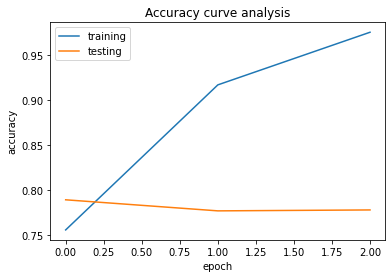

In [76]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy curve analysis')
plt.legend(['training','testing'],loc='best')

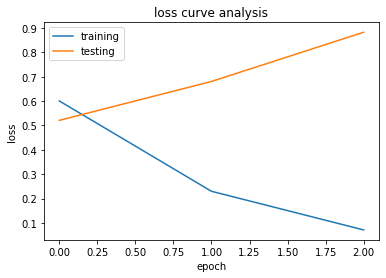

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss curve analysis')
plt.legend(['training','testing'],loc='best')

In [78]:
model.save('Deep learning.h5')